## Creative building task

Environment

- [ ] Create example categories
- [ ] Create example building blocks
- [ ] Create example payoff
- [ ] Test correlations of payoffs

Agents
- [ ] One Agent try and error learning 


In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rng = np.random.default_rng(0)

### Bulding Blocks (Monster)

**Parts**
- Head
- Body
- Character
- Movement
- Supernatural ability

**Payoff of Parts**
- Scariness
- Entertainment
- Comedic

''

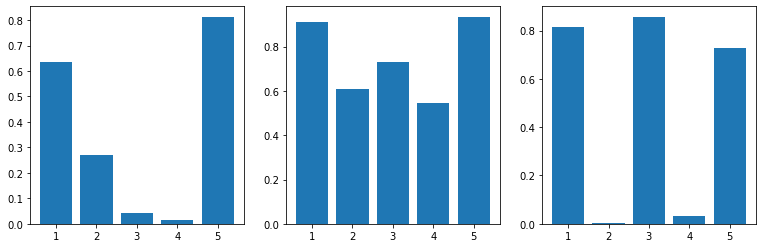

In [4]:
# Starting of with one payoff per part
n_parts = 5
heads = rng.random(n_parts)
bodies = rng.random(n_parts)
ability = rng.random(n_parts)

fig, ax = plt.subplots(1,3, figsize=(13,4))
x = np.arange(1, n_parts+1)
ax[0].set_xticks(x)
ax[1].set_xticks(x)
ax[2].set_xticks(x)

ax[0].bar(x, height=heads)
ax[1].bar(x, height=bodies)
ax[2].bar(x, height=ability)
;

In [5]:
heads = np.stack((x, heads), axis=-1)
bodies = np.stack((x, bodies), axis=-1)
ability = np.stack((x, ability), axis=-1)

In [6]:
monster = np.vstack((rng.choice(heads), rng.choice(bodies), rng.choice(ability)))
m_payoff = monster[:,1].sum()
monster, m_payoff

(array([[5.        , 0.81327024],
        [1.        , 0.91275558],
        [1.        , 0.81585355]]),
 2.541879370599526)

In [585]:
# For later use
class Monster():
    
    def __init__(self, all_blocks):
        self.head : np.array() = np.zeros(2) 
        self.body : np.array() = np.zeros(2)
        self.ability : np.array() = np.zeros(2)
        
        self.all_blocks = all_blocks
        
    def _init_min_monster(self):
        self.head = self.all_blocks[0][(self.all_blocks[0]==self.all_blocks[0].min(axis=0))[:,1]][0]
        self.body = self.all_blocks[1][(self.all_blocks[1]==self.all_blocks[1].min(axis=0))[:,1]][0]
        self.ability = self.all_blocks[2][(self.all_blocks[2]==self.all_blocks[2].min(axis=0))[:,1]][0]
        
    def get_payoff(self):
        return self.head[1] + self.body[1] + self.ability[1]
    
    def get_build(self):
        return np.array([self.head[0], self.body[0], self.ability[0]])
        
    def evaluate_proposal(self, proposal):
        if proposal[0] == 0:
            return proposal[1][1] + self.body[1] + self.ability[1]
        if proposal[0] == 1:
            return self.head[1] + proposal[1][1] + self.ability[1]
        if proposal[0] == 2:
            return self.head[1] + self.body[1] + proposal[1][1]
        
    def update_block(self, proposal):
        if proposal[0] == 0:
            self.head = proposal[1]
        if proposal[0] == 1:
            self.body = proposal[1]
        if proposal[0] == 2:
            self.ability = proposal[1]
        

In [577]:
all_blocks = np.stack((heads, bodies, ability))

m = Monster(all_blocks)
m._init_min_monster()
m.get_payoff()

0.21608461543983348

#### Building a monster by trial and error

In [7]:
def softmax(values, b=1):
    return np.exp(values * b)/ np.exp(values * b).sum()

In [8]:
# Optimization through random exploration
monster

array([[5.        , 0.81327024],
       [1.        , 0.91275558],
       [1.        , 0.81585355]])

In [122]:
def optimize_monster(monster, iterations: 20):

    values = np.zeros(iterations+1)
    values[0] = monster[:,1].sum()

    changes = []
    for i in range(iterations):
        block_type = rng.integers(3)
        p_blocks = softmax(all_blocks[block_type][:,1])
        block_number = rng.choice(x, p= p_blocks)-1
        if monster[block_type][1] < all_blocks[block_type, block_number][1]:
            changes.append(i)
            monster[block_type] = all_blocks[block_type, block_number]
        values[i+1] = monster[:,1].sum()
    return values, changes


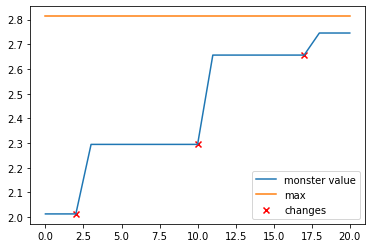

In [123]:
all_blocks = np.stack((heads, bodies, ability))
iterations = 20

monster = np.vstack((rng.choice(heads), rng.choice(bodies), rng.choice(ability)))
values, changes = optimize_monster(monster, iterations)

plt.plot(values, label="monster value")
plt.scatter(changes, values[changes], label="changes", marker="x", c="red")
plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.legend()

In [130]:
all_values = np.zeros((1000, iterations+1))

for j in range(1000):
    monster = np.vstack((rng.choice(heads), rng.choice(bodies), rng.choice(ability)))
    values, _ = optimize_monster(monster, iterations)
    all_values[j] = values


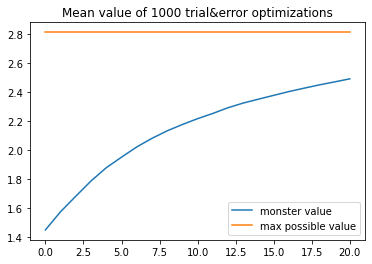

In [136]:
all_values.mean(axis=0)

plt.plot(all_values.mean(axis=0), label="monster value")
plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max possible value")
plt.title("Mean value of 1000 trial&error optimizations")
plt.legend()

### Agents

* [ ] Discover necessary attributes
* [ ] Suitable diversity measure
* [ ] Transform diversity into knowledge
* [ ] Basic cooperation to solve task

In [10]:
from scipy.stats import norm

''

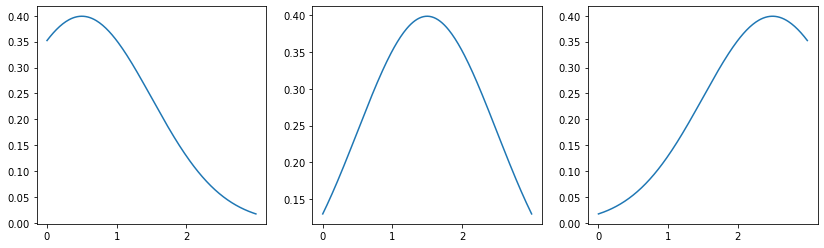

In [11]:
fig, ax = plt.subplots(1,3, figsize=(14,4), sharex=True)
for i in range(3):
    ax[i].set_xticks(np.arange(3))
x_data = np.linspace(0,3,200)
scale= 1
ax[0].plot(x_data, norm.pdf(x_data, 0.5, scale))
ax[1].plot(x_data, norm.pdf(x_data, 1.5, scale))
ax[2].plot(x_data, norm.pdf(x_data, 2.5, scale))
# ax[0].plot(np.clip(rng.normal(0.5, scale, 1000),0,2))
# ax[1].plot(np.clip(rng.normal(1, scale, 1000),0,2))
# ax[2].plot(np.clip(rng.normal(1.5, scale, 1000),0,2))
;

In [12]:
# Create 3x10 blocks (10 different heads, bodies, ...)
n_parts = 10
x = np.arange(10)
heads = np.stack((x, rng.random(n_parts)), axis=-1)
bodies = np.stack((x, rng.random(n_parts)), axis=-1)
ability = np.stack((x, rng.random(n_parts)), axis=-1)

all_blocks = np.stack((heads, bodies, ability))


In [292]:
# Create 3 agents (0.5, 1, 1.5)
scale = 0.7
means = [0.5, 1.5, 2.5]

sample_n_blocks = 5
x_range= np.linspace(0, 3, 100)
# Every agent has a repertoire of 8 parts (one for every category + 5 special ones)
# Agent 0
p = softmax(norm.pdf(x_range, means[0], scale))
sampled_block_types = rng.choice(x_range, p=p, size=sample_n_blocks)




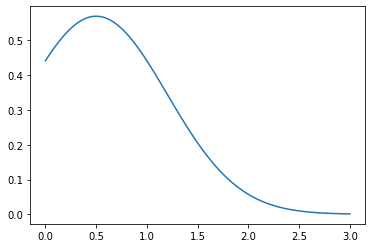

In [293]:
plt.plot(x_range, norm.pdf(x_range, means[0], scale))

In [15]:
sampled_block_types

array([2.81818182, 1.09090909, 2.06060606, 1.18181818, 1.27272727])

In [627]:
class Agent:
    
    def __init__(self, diversity_mean, scale, decision_probability, n_blocks=5):
        # self.rng = ...
        self.diversity_mean = diversity_mean
        self.diversity_scale = scale
        self.decision_probability = decision_probability
        
        self.heads = None
        self.bodies = None
        self.abilities = None
        
        self.proposal = None
        self.proposal_evaluations = []
        
        self.initialize_block_knowledge(n_blocks)
    
    def initialize_block_knowledge(self, sample_n_blocks=5):
        # mandatory 1 block per category?
        x_range = np.linspace(0, 3, 30) # N_data_points = n_blocks
        p = softmax(norm.pdf(x_range, self.diversity_mean, self.diversity_scale), b=5)
        sampled_block_types = rng.choice(x_range, p=p, size=sample_n_blocks, replace=False)
        
        n_heads = np.sum(sampled_block_types<1)
        n_abilities = np.sum(sampled_block_types>2) 
        n_bodies = sample_n_blocks - n_abilities - n_heads
        
        self.heads = rng.choice(all_blocks[0], n_heads, replace=False)
        self.bodies = rng.choice(all_blocks[1], n_bodies, replace=False)
        self.abilities = rng.choice(all_blocks[2], n_abilities, replace=False)
  
    def choose_proposal(self):
        if proposal_probability >= rng.random():
            block_type = rng.integers(3)
            if block_type == 0 and len(self.heads)!= 0:
                self.proposal = [block_type, rng.choice(self.heads, p=softmax(self.heads[:,1]))]
            if block_type == 1 and len(self.bodies)!= 0:
                self.proposal = [block_type, rng.choice(self.bodies, p=softmax(self.bodies[:,1]))]
            if block_type == 2 and len(self.abilities)!= 0:
                self.proposal = [block_type, rng.choice(self.abilities, p=softmax(self.abilities[:,1]))]
        else:
            self.proposal = None
    
    def get_proposal_evaluations(self):
        return np.array(self.proposal_evaluations, dtype=object)
    
    def set_proposal_evaluations(self, evaluation):
        self.proposal_evaluations.append(evaluation)
    
    def reset_proposal_evaluations(self):
        self.proposal_evaluations = []
        

        


In [492]:
decision_probability = 0.5  # 1. Iteration all have the same

In [493]:
a0 = Agent(means[0], scale, decision_probability)
a1 = Agent(means[1], scale, decision_probability)
a2 = Agent(means[2], scale, decision_probability)
agents = np.array([a0, a1, a2])
a1.heads, a1.bodies, a1.abilities

(array([[9.        , 0.79632427]]),
 array([[1.        , 0.0520213 ],
        [3.        , 0.19851304]]),
 array([[0.        , 0.36511017],
        [5.        , 0.95459049]]))

### Information distribution

- Some agents propose a change to the monster
- Each agent vote on which part they may want to exchange
- Hinder information flow through the group:
    - Not every agent knows of every solution
    - Information about performance may be incorrectly communicated
- 

**What social networks may represent:**
- Communication paths
- Social influence path
- Probability of receiving information
- Uncertainty of information (Information theory/ Encoder-Channel-Decoder)

**Ideas**:
- Inforamtion needs to wander through the group. Every iteration, the information may travel one person forward

In [598]:
# Set up a monster to start with
m = Monster(all_blocks)
m._init_min_monster()
print(f"Initial (min) payoff: {m.get_payoff()} with build {m.get_build()}")


Initial (min) payoff: 0.21608461543983348 with build [5. 1. 1.]


In [599]:
# Social connections
net = np.ones((3,3), dtype=int)
# np.fill_diagonal(net, 1) # Remember their own ideas
print(net)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [600]:
# Proposing

# Decide if and which block they want to propose for change (based on softmax)
proposals = []
for a in agents:
    a.choose_proposal()
    print(a.proposal)

[0, array([9.        , 0.79632427])]
None
[2, array([8.        , 0.62021345])]


In [601]:
# Current solution 
current_payoff = m.get_payoff()

# Communicate the proposal to others
for i,a in enumerate(agents):
    a.reset_proposal_evaluations()

for i,a in enumerate(agents):
    if a.proposal is not None:
        proposal_evaluation = m.evaluate_proposal(a.proposal)
        for ag in agents[net[i].astype(bool)]:
            ag.set_proposal_evaluations([i, proposal_evaluation])
    
        

In [602]:
# Voting
votes = np.zeros(3)
for i, a in enumerate(agents):
    vote_for_agent =rng.choice(a.get_proposal_evaluations()[:,0], p=softmax(a.get_proposal_evaluations()[:,1].astype(float)))
    votes[vote_for_agent] += 1

winner_proposal = votes.argmax()
winner_proposal

0

In [603]:
# Applying vote
print(agents[winner_proposal].proposal)
if m.evaluate_proposal(agents[winner_proposal].proposal) > m.get_payoff():
    m.update_block(agents[winner_proposal].proposal)

[0, array([9.        , 0.79632427])]


In [605]:
print(f"After one iteration payoff: {m.get_payoff()} with build {m.get_build()}")

After one iteration (min) payoff: 0.9538408509219334 with build [9. 1. 1.]


**Multiple iterations**

In [702]:
def run_simulation(rng, iterations=30, n_agents=6, n_blocks=5, scale=0.7, decision_probability=0.5 , prints=False):

    # Set up a monster to start with
    monster = Monster(all_blocks)
    monster._init_min_monster()
    if prints:
        print(f"Initial (min) payoff: {round(monster.get_payoff(), 4)} with build {monster.get_build()}")

    # Set up agents
    means = rng.random(n_agents) * 3  # [0.5, 1.5, 2.5 , 1, 0, 3];
    agents = np.array([Agent(means[_], scale, decision_probability, n_blocks) for _ in range(n_agents)])

    # Social connections
    net = np.ones((n_agents, n_agents), dtype=int)

    # Run
    monster_value_tracker = np.zeros(iterations+1)
    monster_value_tracker[0] = monster.get_payoff()
    for it in range(iterations):

        # Prepare proposals
        proposals = []
        for a in agents:
            a.choose_proposal()

        # Distribute Info about proposals
        for a in agents:
            a.reset_proposal_evaluations()

        for i, a in enumerate(agents):
            if a.proposal is not None:
                proposal_evaluation = monster.evaluate_proposal(a.proposal)
                for ag in agents[net[i].astype(bool)]:
                    ag.set_proposal_evaluations([i, proposal_evaluation])

        # Voting
        votes = np.zeros(n_agents)
        for i, a in enumerate(agents):
            proposal_evaluations = a.get_proposal_evaluations()
            if len(proposal_evaluations) != 0:
                vote_for_agent =rng.choice(
                    proposal_evaluations[:,0],
                    p=softmax(proposal_evaluations[:,1].astype(float))
                )
                votes[vote_for_agent] += 1
        winner_proposal = votes.argmax()

        # Applying vote
        if votes.sum() > 0 and monster.evaluate_proposal(agents[winner_proposal].proposal) > monster.get_payoff():
            monster.update_block(agents[winner_proposal].proposal)

        monster_value_tracker[it+1] = monster.get_payoff()
        if iterations <=20 and prints:
            print(f"Iteration {it} payoff: {round(monster.get_payoff(),4)}; build {monster.get_build()}")
        
    return monster_value_tracker

Initial (min) payoff: 0.2161 with build [5. 1. 1.]


''

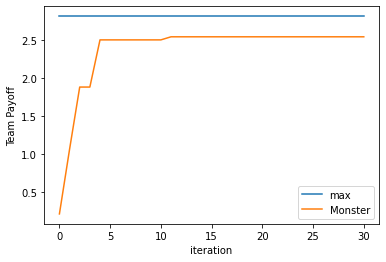

In [703]:
seed = np.random.randint(100)
rng = np.random.default_rng(seed)

iterations = 30

n_agents = 6
n_blocks = 6
scale = 0.7; 
decision_probability=0.5

values = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability, prints=True)

plt.ylabel("Team Payoff")
plt.xlabel("iteration")
plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(values, label="Monster");
plt.legend()
;

''

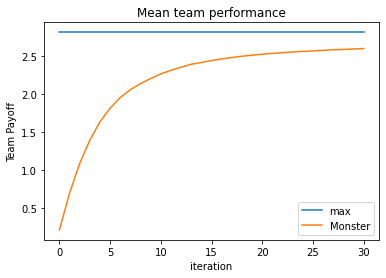

In [707]:
rng = np.random.default_rng(0)

n_simulations = 1000
iterations = 30

n_agents = 6
n_blocks = 6
scale = 0.7; 
decision_probability=0.5

all_values = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values[i_sim] = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)


plt.title("Mean team performance")
plt.ylabel("Team Payoff")
plt.xlabel("iteration")
plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(all_values.mean(axis=0), label="Monster");
plt.legend()
;

''

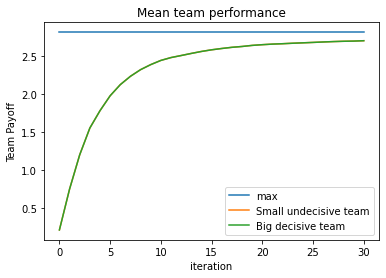

In [708]:
rng = np.random.default_rng(0)

n_simulations = 1000
iterations = 30

n_agents = 7
n_blocks = 8
scale = 0.7; 
decision_probability=0.7

all_values_new = np.zeros((n_simulations, iterations+1))
for i_sim in range(n_simulations):
    all_values_new[i_sim] = run_simulation(rng, iterations, n_agents, n_blocks, scale, decision_probability)


plt.title("Mean team performance")
plt.ylabel("Team Payoff")
plt.xlabel("iteration")
plt.plot(np.ones(iterations+1) * all_blocks.max(axis=1)[:,1].sum(), label="max")
plt.plot(all_values_new.mean(axis=0), label="Small undecisive team");
plt.plot(all_values_new.mean(axis=0), label="Big decisive team");

plt.legend()
;